___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

In [272]:
#2012 yilinda 2010 dan 2012 ye kadar raraporlanan kadin ve erkek askerlerin vücut ölcüleri ile ilgili tüm ölcüm ve bilgiler var
#öncelikle EDA kapsaminda inceleme yapilacak

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [273]:
#!pip install xgboost==0.90

In [274]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [275]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')

In [276]:
#encoding hata verince utf8  yerine latin 1 yazildi

In [277]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

## Explore Data

In [278]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [279]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [280]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [281]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [282]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [283]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [284]:
df= pd.concat([df_male,df_female], axis=0, ignore_index=True)   
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [285]:
df.shape

(6068, 108)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [287]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [288]:
df.isnull().sum().any()

True

In [289]:
df.duplicated().sum()

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


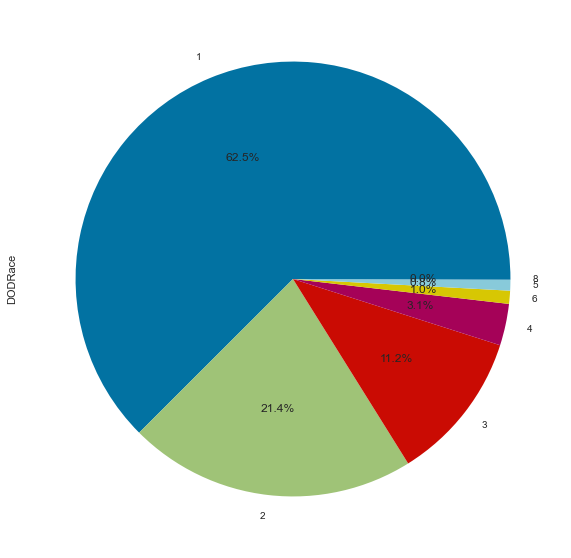

In [290]:
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [291]:
df.select_dtypes("O")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


In [292]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                         4647
subjectid                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
suprasternaleheight                  0
stature                              0
span                                 0
sleeveoutseam                        0
sleevelengthspinewrist               0
sittingheight                        0
shoulderlength                       0
shoulderelbowlength                  0
shouldercircumference                0
poplitealheight                      0
thumbtipreach                        0
palmlength                           0
overheadfingertipreachsitting        0
neckcircumferencebase                0
neckcircumference                    0
mentonsellionlength                  0
lowerthighcircumference              0
lateralmalleolusheight               0
lateralfemoralepicondyleheight       0
kneeheightsitting                    0
kneeheightmidpatella     

In [293]:
[col for col in df.columns if df[col].isnull().any()]

['Ethnicity']

In [294]:
df['Ethnicity'].isnull().sum()

4647

In [295]:
df.drop('Ethnicity', axis=1, inplace=True)

In [296]:
df.describe(include=['O'])

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
count,6068,6068,6068,6068,6068,6068,6068,6068
unique,2,253,12,3,3,285,152,3
top,Male,27-Feb-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Right hand
freq,4082,45,1160,3140,3174,671,446,5350


In [297]:
print(df["DODRace"].value_counts())

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


In [298]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [299]:
df["DODRace"] = df.DODRace.map({
                                    1: "White",
                                    2: "Black",
                                    3: "Hispanic",
                                    4: "Asian",
                                    5: "Native American",
                                    6: "Pacific Islander",
                                    8: "Other"
                                  })

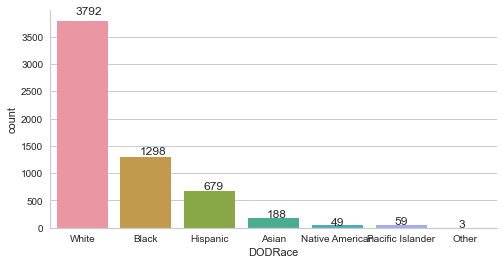

In [300]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['DODRace'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [301]:
df.groupby(["Weightlbs"])["DODRace"].value_counts()

Weightlbs  DODRace         
0          Hispanic              1
86         White                 1
88         White                 1
90         Black                 1
95         Black                 1
           Hispanic              1
           White                 1
96         White                 1
98         Hispanic              1
100        Black                 3
           Asian                 2
           White                 2
101        White                 1
102        White                 2
           Asian                 1
           Native American       1
103        White                 3
           Black                 2
           Hispanic              1
           Pacific Islander      1
104        Hispanic              2
105        White                 5
           Hispanic              2
           Asian                 1
           Black                 1
           Pacific Islander      1
106        Black                 2
           Pacific Islander

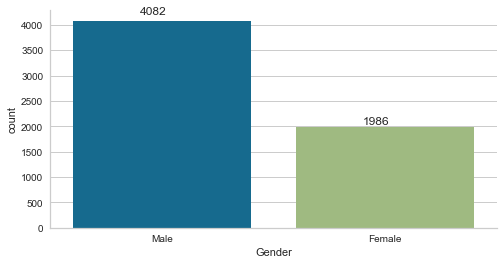

In [302]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['Gender'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

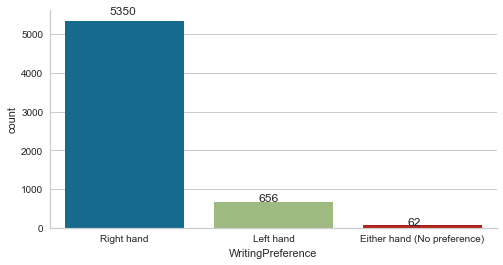

In [303]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['WritingPreference'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [304]:
df.groupby(['WritingPreference'])["DODRace"].value_counts()

WritingPreference            DODRace         
Either hand (No preference)  White                 43
                             Black                 13
                             Hispanic               3
                             Asian                  2
                             Native American        1
Left hand                    White                422
                             Black                150
                             Hispanic              50
                             Asian                 22
                             Pacific Islander       7
                             Native American        5
Right hand                   White               3327
                             Black               1135
                             Hispanic             626
                             Asian                164
                             Pacific Islander      52
                             Native American       43
                             Other  

In [305]:
df.SubjectsBirthLocation.value_counts().head(20)

California        446
New York          420
Texas             397
Indiana           266
Oklahoma          221
Illinois          216
Florida           210
Minnesota         200
Michigan          196
Mississippi       194
Georgia           170
Alabama           164
South Carolina    161
North Carolina    149
Ohio              142
Louisiana         137
Pennsylvania      132
Virginia          118
Massachusetts     112
Wisconsin         102
Name: SubjectsBirthLocation, dtype: int64

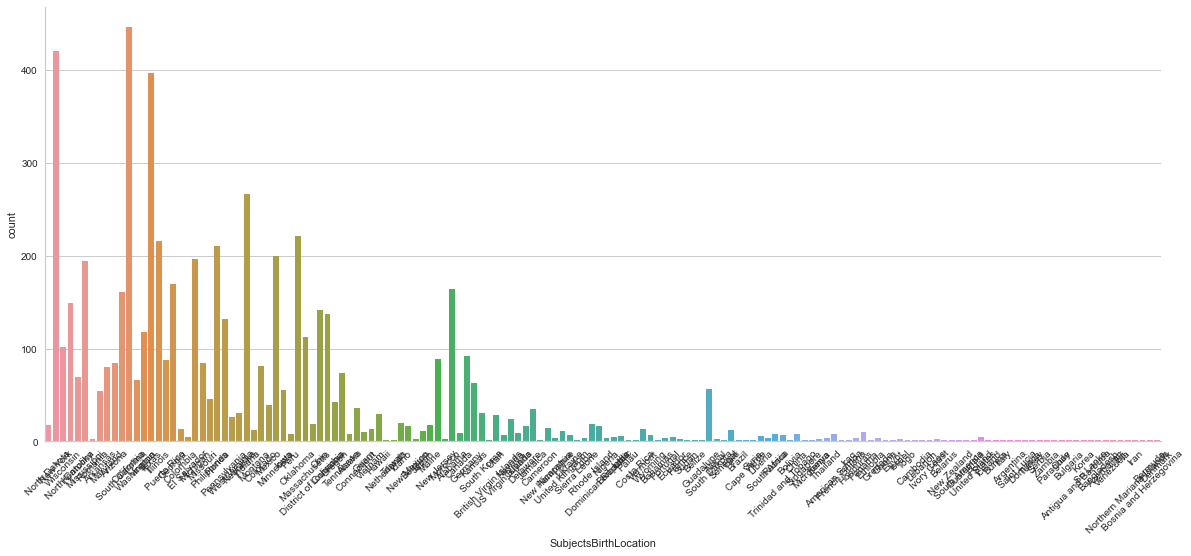

In [306]:
plt.figure(figsize=(20,8))
ax = sns.countplot(df['SubjectsBirthLocation'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45);

Text(0.5, 1.0, 'Hispanic')

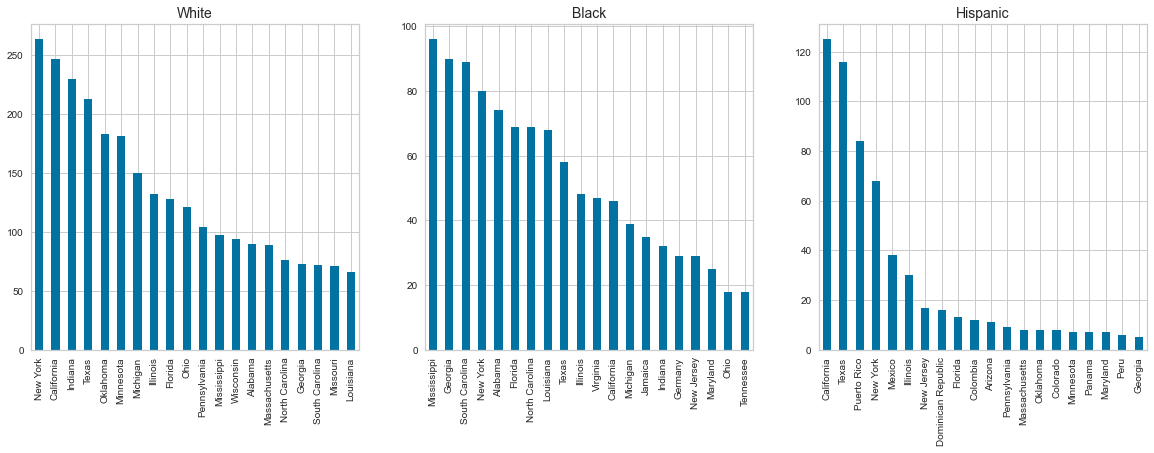

In [307]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df['SubjectsBirthLocation'][df.DODRace == "White"].value_counts().head(20).plot(kind= 'bar')
plt.title("White", size=14)
plt.subplot(1,3,2)
df['SubjectsBirthLocation'][df.DODRace == "Black"].value_counts().head(20).plot(kind= 'bar')
plt.title("Black", size=14)
plt.subplot(1,3,3)
df['SubjectsBirthLocation'][df.DODRace == "Hispanic"].value_counts().head(20).plot(kind= 'bar')
plt.title("Hispanic", size=14)

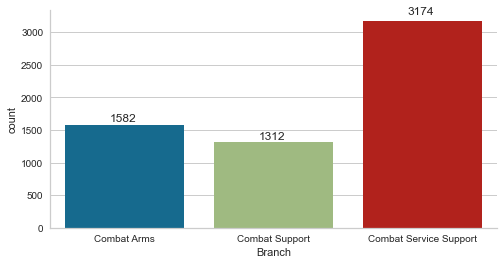

In [308]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['Branch'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [309]:
df.groupby(['Branch'])["DODRace"].value_counts()

Branch                  DODRace         
Combat Arms             White               1146
                        Hispanic             189
                        Black                173
                        Asian                 44
                        Native American       16
                        Pacific Islander      13
                        Other                  1
Combat Service Support  White               1911
                        Black                745
                        Hispanic             365
                        Asian                 99
                        Pacific Islander      27
                        Native American       25
                        Other                  2
Combat Support          White                735
                        Black                380
                        Hispanic             125
                        Asian                 45
                        Pacific Islander      19
                        Nati

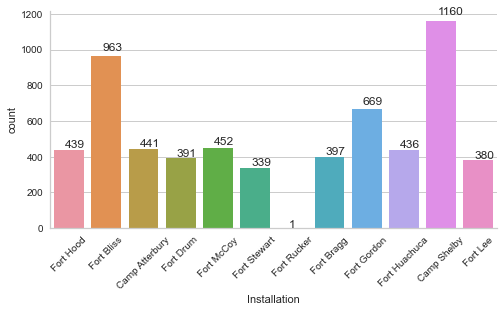

In [310]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df["Installation"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03))
    plt.xticks(rotation=45);

In [311]:
df.groupby(["DODRace"])['Installation'].value_counts().tail(50)

DODRace           Installation  
Black             Camp Atterbury     77
                  Fort Drum          65
                  Fort Huachuca      51
                  Fort McCoy         27
Hispanic          Fort Bliss        124
                  Camp Shelby        97
                  Fort Gordon        77
                  Fort Bragg         66
                  Fort McCoy         61
                  Fort Drum          55
                  Fort Hood          54
                  Fort Stewart       47
                  Fort Lee           42
                  Fort Huachuca      39
                  Camp Atterbury     17
Native American   Camp Shelby        17
                  Fort Bliss          9
                  Fort Bragg          5
                  Fort Gordon         3
                  Fort Lee            3
                  Fort McCoy          3
                  Fort Drum           2
                  Fort Hood           2
                  Fort Huachuca       2
       

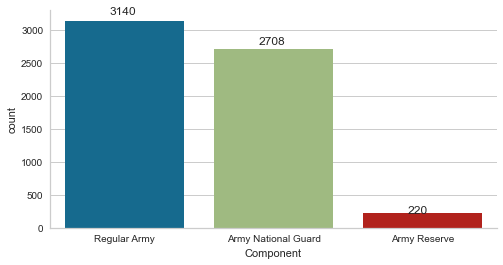

In [312]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df["Component"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [313]:
df.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace         
Army National Guard  White               1855
                     Black                499
                     Hispanic             253
                     Asian                 60
                     Native American       24
                     Pacific Islander      17
Army Reserve         White                114
                     Black                 52
                     Hispanic              41
                     Asian                  9
                     Pacific Islander       3
                     Native American        1
Regular Army         White               1823
                     Black                747
                     Hispanic             385
                     Asian                119
                     Pacific Islander      39
                     Native American       24
                     Other                  3
Name: DODRace, dtype: int64

In [314]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

In [315]:
drop_list1 = [
    "Date", "Installation", "Component",  "PrimaryMOS",
    "Weightlbs", "Heightin", 'WritingPreference',   
]

In [316]:
df.drop(drop_list1, axis=1, inplace=True)

In [317]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [318]:
df.SubjectNumericRace.unique()

array([    1,     2,   351,     3,    61,     4,    28,     5,    21,
          41,    31,   641,    23,     8,   251,    38,     6,    51,
          18,    64,   318,    63,    25,    43,   423,    35,   425,
         235,   358,    62,    42,   451,   238,  4251,   431,  2518,
         218,   231,   428,   651,   631,    48,  2351, 42351],
      dtype=int64)

In [319]:
df.groupby(["DODRace"])['SubjectNumericRace'].value_counts().head(50)

DODRace   SubjectNumericRace
Asian     4                      108
          41                      26
          6                       21
          8                       10
          61                       8
          64                       6
          43                       2
          18                       1
          42                       1
          48                       1
          62                       1
          63                       1
          451                      1
          641                      1
Black     2                     1025
          8                       94
          21                      51
          23                      26
          28                      25
          251                     18
          25                      13
          3                        6
          42                       6
          62                       6
          38                       4
          18                       3
         

In [320]:
df.drop("SubjectNumericRace",axis=1,inplace=True)

In [321]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [322]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]

In [323]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [324]:
df.reset_index(drop=True, inplace=True)

In [325]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

<AxesSubplot:>

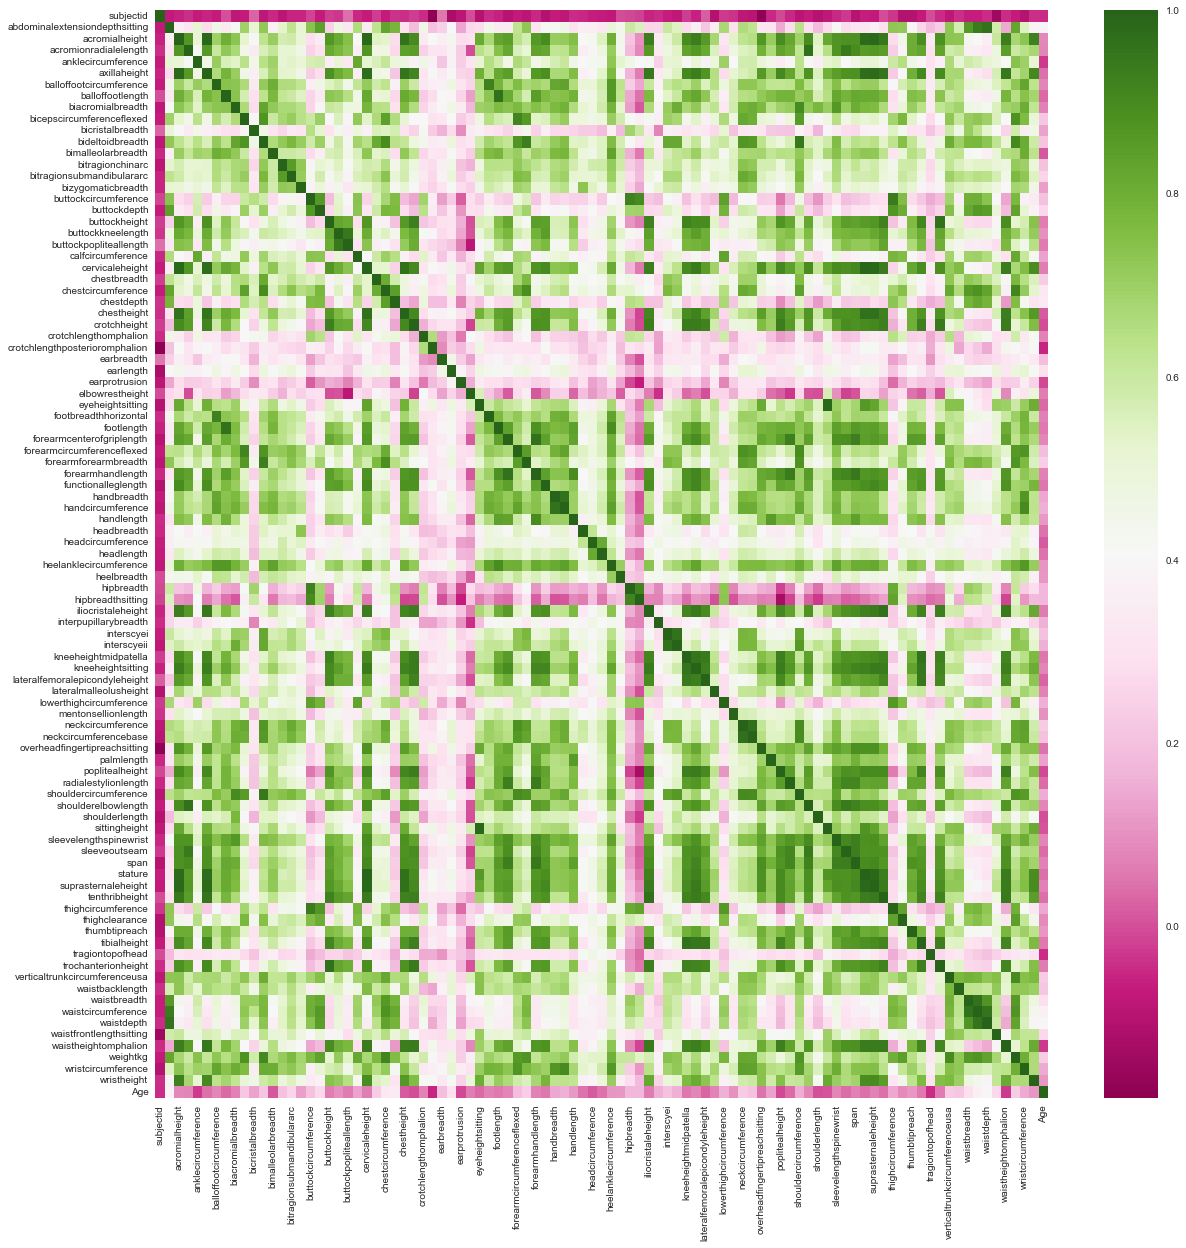

In [326]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="PiYG")

In [327]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)

In [328]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,stature
8,acromialheight,suprasternaleheight
9,acromialheight,tenthribheight


In [329]:
df.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference',
       'headl

In [330]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

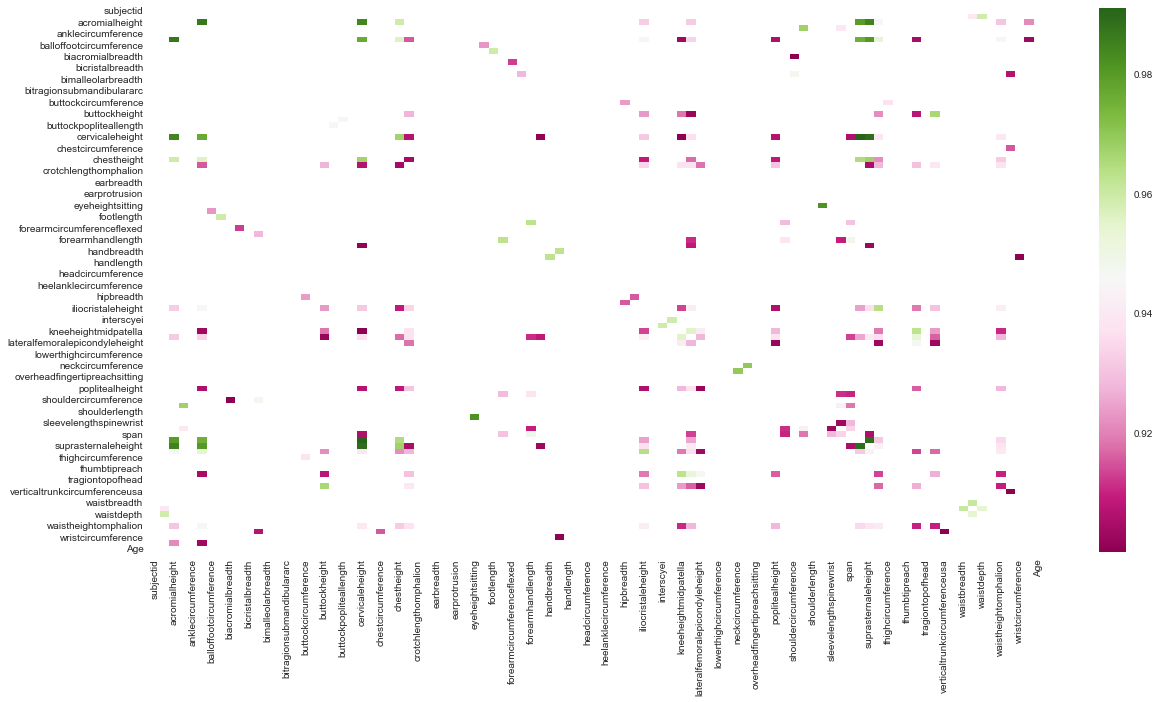

In [331]:
df_temp = df.corr()
filteredDf = df_temp[((df_temp >= .9) | (df_temp <= -.9)) & (df_temp !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf,cmap="PiYG")  
plt.show()

In [332]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

subjectid            subjectid                    1.000000
stature              cervicaleheight              0.991053
suprasternaleheight  stature                      0.989120
                     cervicaleheight              0.989112
axillaheight         acromialheight               0.987115
suprasternaleheight  acromialheight               0.984711
acromialheight       cervicaleheight              0.983955
sittingheight        eyeheightsitting             0.981732
suprasternaleheight  axillaheight                 0.980594
acromialheight       stature                      0.979925
axillaheight         cervicaleheight              0.976609
                     stature                      0.975436
neckcircumference    neckcircumferencebase        0.969495
shoulderelbowlength  acromionradialelength        0.967500
suprasternaleheight  chestheight                  0.967309
cervicaleheight      chestheight                  0.967151
buttockheight        trochanterionheight          0.9659

In [333]:
def outlier_function(df, col_name,k):
   
    
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(k*IQR)
    lower_limit = first_quartile-(k*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [334]:
k=1.5
print("\tNumber of Outliers for {}*IQR\n".format(k))
total=0
for col in df.select_dtypes("number"):
    if outlier_function(df.select_dtypes("number"), col,k)[2] > 0:
        outliers=outlier_function(df.select_dtypes("number"), col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n\t{} OUTLIERS TOTALLY".format(total))

	Number of Outliers for 1.5*IQR

1 outliers in 'subjectid'
46 outliers in 'abdominalextensiondepthsitting'
14 outliers in 'acromialheight'
31 outliers in 'acromionradialelength'
73 outliers in 'anklecircumference'
27 outliers in 'axillaheight'
23 outliers in 'balloffootcircumference'
11 outliers in 'balloffootlength'
1 outliers in 'biacromialbreadth'
19 outliers in 'bicepscircumferenceflexed'
57 outliers in 'bicristalbreadth'
12 outliers in 'bideltoidbreadth'
6 outliers in 'bimalleolarbreadth'
46 outliers in 'bitragionchinarc'
16 outliers in 'bitragionsubmandibulararc'
6 outliers in 'bizygomaticbreadth'
58 outliers in 'buttockcircumference'
47 outliers in 'buttockdepth'
42 outliers in 'buttockheight'
27 outliers in 'buttockkneelength'
25 outliers in 'buttockpopliteallength'
53 outliers in 'calfcircumference'
10 outliers in 'cervicaleheight'
29 outliers in 'chestbreadth'
15 outliers in 'chestcircumference'
29 outliers in 'chestdepth'
11 outliers in 'chestheight'
19 outliers in 'crotchhe

In [335]:
k=3
for i in df.select_dtypes("number"):
    lower,upper,outliers=outlier_function(df.select_dtypes("number"),i,k)
    df=df[(df.select_dtypes("number")[i]>lower)&(df.select_dtypes("number")[i]<upper)]

In [336]:
df.shape

(5763, 99)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 5767
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   subjectid                       5763 non-null   int64 
 1   abdominalextensiondepthsitting  5763 non-null   int64 
 2   acromialheight                  5763 non-null   int64 
 3   acromionradialelength           5763 non-null   int64 
 4   anklecircumference              5763 non-null   int64 
 5   axillaheight                    5763 non-null   int64 
 6   balloffootcircumference         5763 non-null   int64 
 7   balloffootlength                5763 non-null   int64 
 8   biacromialbreadth               5763 non-null   int64 
 9   bicepscircumferenceflexed       5763 non-null   int64 
 10  bicristalbreadth                5763 non-null   int64 
 11  bideltoidbreadth                5763 non-null   int64 
 12  bimalleolarbreadth              5763 non-null   

In [338]:
df.reset_index(drop=True, inplace=True)

In [339]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21


In [340]:
df.drop('subjectid', axis=1, inplace=True)

In [341]:
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Combat Support,New York,White,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Combat Support,New York,Black,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [342]:
pd.get_dummies(df.drop(columns=['DODRace']))

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Gender_Female,Gender_Male,Branch_Combat Arms,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alabama,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthL

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [344]:
X = df.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [346]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4610, 232)
Train target shape   :  (4610,)
Test features shape  :  (1153, 232)
Test target shape    :  (1153,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [347]:
from sklearn.linear_model import LogisticRegression

In [348]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [349]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [350]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[237  16   6]
 [  5 110  21]
 [ 18  95 645]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       259
    Hispanic       0.50      0.81      0.62       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1153
   macro avg       0.79      0.86      0.81      1153
weighted avg       0.89      0.86      0.87      1153


Train_Set
[[ 961   41   34]
 [  21  448   73]
 [  59  366 2607]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1036
    Hispanic       0.52      0.83      0.64       542
       White       0.96      0.86      0.91      3032

    accuracy                           0.87      4610
   macro avg       0.80      0.87      0.82      4610
weighted avg       0.90      0.87      0.88      4610



In [351]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [352]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

In [353]:
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.593757
test_precision_Hispanic    0.484661
test_recall_Hispanic       0.769259
dtype: float64

### Logistic Model GridsearchCV

In [354]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [355]:
param_grid = {
    "log__C": [0.3, 0.5, 0.6],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [356]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [357]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.3, 0.5, 0.6],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [358]:
log_model_grid.best_params_

{'log__C': 0.6, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [359]:
log_model_grid.best_score_

0.7656982670744139

In [360]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[237  16   6]
 [  4 111  21]
 [ 18  98 642]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       259
    Hispanic       0.49      0.82      0.61       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1153
   macro avg       0.79      0.86      0.81      1153
weighted avg       0.89      0.86      0.87      1153


Train_Set
[[ 956   43   37]
 [  24  444   74]
 [  62  370 2600]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1036
    Hispanic       0.52      0.82      0.63       542
       White       0.96      0.86      0.91      3032

    accuracy                           0.87      4610
   macro avg       0.80      0.87      0.82      4610
weighted avg       0.90      0.87      0.88      4610



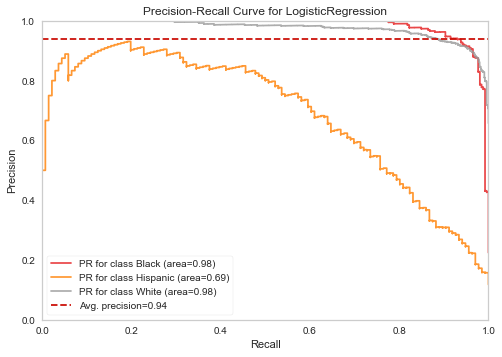

In [361]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [362]:
viz.score_ 

{'Black': 0.9839030064421525,
 'Hispanic': 0.6868066442742005,
 'White': 0.9756975466450469,
 'micro': 0.938461672926835}

In [363]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [364]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)

In [365]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[245   6   8]
 [  5  92  39]
 [ 12  41 705]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94       259
    Hispanic       0.66      0.68      0.67       136
       White       0.94      0.93      0.93       758

    accuracy                           0.90      1153
   macro avg       0.84      0.85      0.85      1153
weighted avg       0.90      0.90      0.90      1153


Train_Set
[[ 971   15   50]
 [  30  378  134]
 [  52  150 2830]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1036
    Hispanic       0.70      0.70      0.70       542
       White       0.94      0.93      0.94      3032

    accuracy                           0.91      4610
   macro avg       0.85      0.86      0.85      4610
weighted avg       0.91      0.91      0.91      4610



In [366]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10,  return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.660118
train_f1_Hispanic           0.700553
test_precision_Hispanic     0.676502
train_precision_Hispanic    0.703524
test_recall_Hispanic        0.647710
train_recall_Hispanic       0.697619
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [367]:
operations_svc = [("scaler", StandardScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [368]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240   9  10]
 [  3 111  22]
 [ 23  82 653]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.91       259
    Hispanic       0.55      0.82      0.66       136
       White       0.95      0.86      0.91       758

    accuracy                           0.87      1153
   macro avg       0.80      0.87      0.83      1153
weighted avg       0.89      0.87      0.88      1153


Train_Set
[[ 979   25   32]
 [  15  480   47]
 [  48  301 2683]]
              precision    recall  f1-score   support

       Black       0.94      0.94      0.94      1036
    Hispanic       0.60      0.89      0.71       542
       White       0.97      0.88      0.93      3032

    accuracy                           0.90      4610
   macro avg       0.84      0.91      0.86      4610
weighted avg       0.92      0.90      0.90      4610



In [369]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.600310
train_f1_Hispanic           0.717367
test_precision_Hispanic     0.508200
train_precision_Hispanic    0.599911
test_recall_Hispanic        0.736061
train_recall_Hispanic       0.892171
dtype: float64

###  SVC Model GridsearchCV

In [370]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [371]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [372]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [373]:
svm_model_grid.best_params_

{'svc__C': 1, 'svc__gamma': 'scale'}

In [374]:
svm_model_grid.best_score_

0.7472137274889568

In [375]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  11   8]
 [  3 113  20]
 [ 20 101 637]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       259
    Hispanic       0.50      0.83      0.63       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1153
   macro avg       0.79      0.87      0.81      1153
weighted avg       0.89      0.86      0.87      1153


Train_Set
[[ 955   40   41]
 [  25  451   66]
 [  58  398 2576]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1036
    Hispanic       0.51      0.83      0.63       542
       White       0.96      0.85      0.90      3032

    accuracy                           0.86      4610
   macro avg       0.80      0.87      0.82      4610
weighted avg       0.90      0.86      0.87      4610



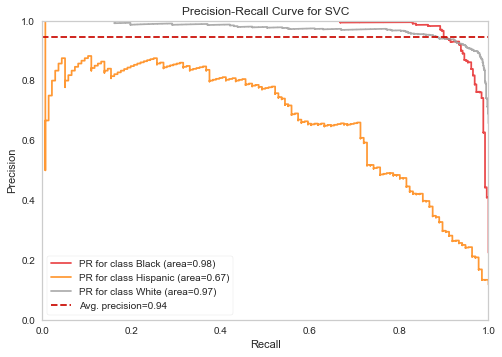

In [376]:
operations_svc = [("scaler", StandardScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [377]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [378]:
from sklearn.preprocessing import OrdinalEncoder

In [379]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [380]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'Branch', 'SubjectsBirthLocation'], dtype='object')

In [381]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,Age
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,0.0,91.0,41
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,2.0,86.0,35
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,2.0,86.0,42
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,1.0,133.0,31
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,1.0,90.0,21


In [382]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [383]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4610, 97)
Train target shape   :  (4610,)
Test features shape  :  (1153, 97)
Test target shape    :  (1153,)


In [384]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [386]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [387]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[185   0  74]
 [  9   7 120]
 [  9   0 749]]
              precision    recall  f1-score   support

       Black       0.91      0.71      0.80       259
    Hispanic       1.00      0.05      0.10       136
       White       0.79      0.99      0.88       758

    accuracy                           0.82      1153
   macro avg       0.90      0.58      0.59      1153
weighted avg       0.84      0.82      0.77      1153


Train_Set
[[1036    0    0]
 [   0  542    0]
 [   0    0 3032]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1036
    Hispanic       1.00      1.00      1.00       542
       White       1.00      1.00      1.00      3032

    accuracy                           1.00      4610
   macro avg       1.00      1.00      1.00      4610
weighted avg       1.00      1.00      1.00      4610



In [388]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.072967
test_precision_Hispanic    0.644444
test_recall_Hispanic       0.038736
dtype: float64

### RF Model GridsearchCV

In [392]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]} 

In [393]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [395]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16],
                         'n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [396]:
rf_grid_model.best_score_

0.22149167516139992

In [397]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [398]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[205   2  52]
 [ 13  31  92]
 [ 15  29 714]]
              precision    recall  f1-score   support

       Black       0.88      0.79      0.83       259
    Hispanic       0.50      0.23      0.31       136
       White       0.83      0.94      0.88       758

    accuracy                           0.82      1153
   macro avg       0.74      0.65      0.68      1153
weighted avg       0.80      0.82      0.81      1153


Train_Set
[[1021    1   14]
 [   0  530   12]
 [   3   22 3007]]
              precision    recall  f1-score   support

       Black       1.00      0.99      0.99      1036
    Hispanic       0.96      0.98      0.97       542
       White       0.99      0.99      0.99      3032

    accuracy                           0.99      4610
   macro avg       0.98      0.99      0.98      4610
weighted avg       0.99      0.99      0.99      4610



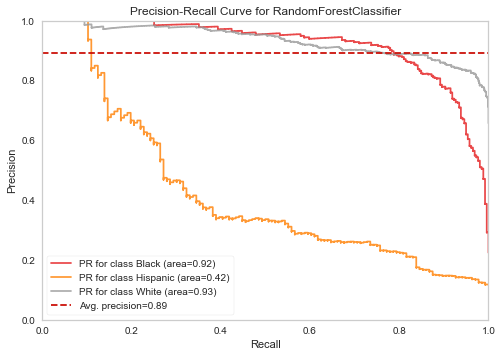

In [399]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 400)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [400]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [401]:
import xgboost as xgb

xgb.__version__

'0.90'

In [402]:
xgb_model = XGBClassifier(random_state=101)

In [423]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.83517835, 0.50681618, 0.50681618, ..., 0.50681618, 0.50681618,
       0.50681618])

In [426]:
comp = pd.DataFrame(classes_weights, columns=["weights"], index = y_train.index)

comp["label"] = y_train2
comp.head()

,weights,label
4978,2.835178,Hispanic
3960,0.506816,White
3025,0.506816,White
586,0.506816,White
995,0.506816,White


In [425]:
comp.groupby("label")["weights"].value_counts()

label     weights 
Black     1.483269    1036
Hispanic  2.835178     542
White     0.506816    3032
Name: weights, dtype: int64

In [427]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.483269    1036
Hispanic  2.835178     542
White     0.506816    3032
Name: 0, dtype: int64

In [428]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=101)

In [429]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[227  12  20]
 [  7  89  40]
 [ 37 106 615]]
              precision    recall  f1-score   support

       Black       0.84      0.88      0.86       259
    Hispanic       0.43      0.65      0.52       136
       White       0.91      0.81      0.86       758

    accuracy                           0.81      1153
   macro avg       0.73      0.78      0.74      1153
weighted avg       0.84      0.81      0.82      1153


Train_Set
[[ 976   26   34]
 [  17  463   62]
 [  80  323 2629]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1036
    Hispanic       0.57      0.85      0.68       542
       White       0.96      0.87      0.91      3032

    accuracy                           0.88      4610
   macro avg       0.81      0.89      0.84      4610
weighted avg       0.91      0.88      0.89      4610



In [430]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5,return_train_score=True,
                                                fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic            0.499932
train_f1_Hispanic           0.710228
test_precision_Hispanic     0.424587
train_precision_Hispanic    0.598192
test_recall_Hispanic        0.610635
train_recall_Hispanic       0.874083
dtype: float64

### XGBoost Model GridsearchCV

In [431]:
param_grid = {"n_estimators":[20, 40],
              'max_depth':[1,2],
              "learning_rate": [0.03, 0.05],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [432]:
xgb_model = XGBClassifier(random_state=101)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [433]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 40,
 'subsample': 1}

In [435]:
xgb_grid_model.best_score_

0.5791879034998301

In [434]:
xgb_grid_model.best_index_

15

In [436]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[203  29  27]
 [ 16  77  43]
 [ 81 180 497]]
              precision    recall  f1-score   support

       Black       0.68      0.78      0.73       259
    Hispanic       0.27      0.57      0.36       136
       White       0.88      0.66      0.75       758

    accuracy                           0.67      1153
   macro avg       0.61      0.67      0.61      1153
weighted avg       0.76      0.67      0.70      1153


Train_Set
[[ 809  139   88]
 [  70  342  130]
 [ 291  647 2094]]
              precision    recall  f1-score   support

       Black       0.69      0.78      0.73      1036
    Hispanic       0.30      0.63      0.41       542
       White       0.91      0.69      0.78      3032

    accuracy                           0.70      4610
   macro avg       0.63      0.70      0.64      4610
weighted avg       0.79      0.70      0.73      4610



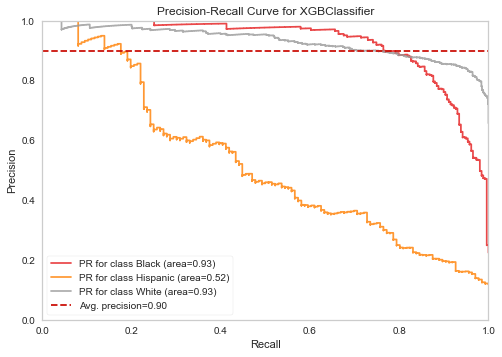

In [437]:
model = XGBClassifier(learning_rate=0.3, max_depth=1,
              random_state=101, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [438]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

Comparing Models

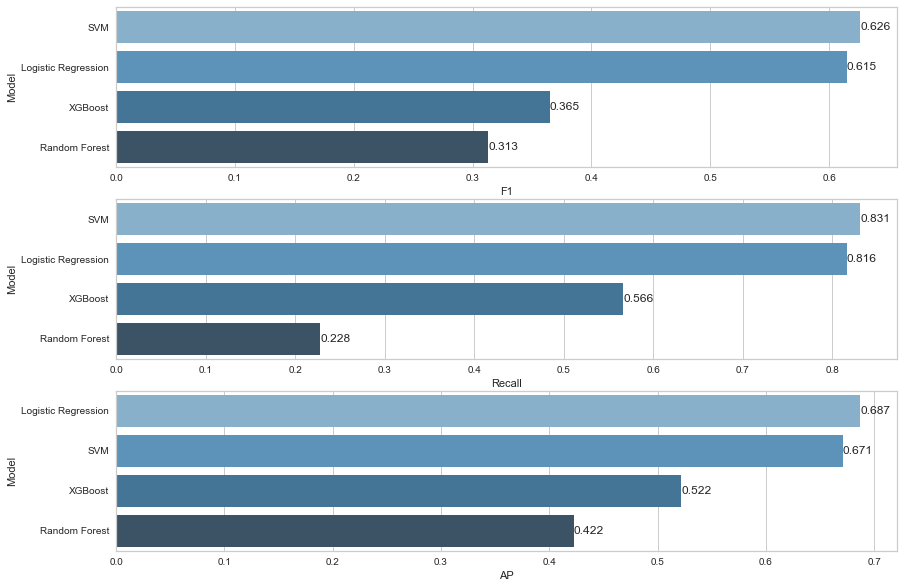

In [439]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                       
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:1.3f}'.format(width),            
                ha = 'left',                         
                va = 'center')                      
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [440]:
#!pip install imblearn

In [442]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline

In [443]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [444]:
X_over.shape

(9096, 232)

In [445]:
y_over.value_counts()

Hispanic    3032
White       3032
Black       3032
Name: DODRace, dtype: int64

In [446]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [447]:
X_under.shape

(1626, 232)

In [448]:
y_under.value_counts()

Black       542
Hispanic    542
White       542
Name: DODRace, dtype: int64

In [449]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [450]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [451]:
y_resampled_over.value_counts()

White       3032
Black       1036
Hispanic    1000
Name: DODRace, dtype: int64

In [452]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [453]:
y_resampled_under.value_counts()

White       2500
Black       1036
Hispanic     542
Name: DODRace, dtype: int64

In [454]:
y_train.value_counts()

White       3032
Black       1036
Hispanic     542
Name: DODRace, dtype: int64

In [455]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [456]:
smote_pipeline = imbpipeline(steps=operations)

In [457]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [458]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[237  13   9]
 [  4  87  45]
 [  8  34 716]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93       259
    Hispanic       0.65      0.64      0.64       136
       White       0.93      0.94      0.94       758

    accuracy                           0.90      1153
   macro avg       0.84      0.83      0.84      1153
weighted avg       0.90      0.90      0.90      1153


Train_Set
[[ 949   28   59]
 [  27  349  166]
 [  36  121 2875]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93      1036
    Hispanic       0.70      0.64      0.67       542
       White       0.93      0.95      0.94      3032

    accuracy                           0.91      4610
   macro avg       0.86      0.84      0.85      4610
weighted avg       0.90      0.91      0.90      4610



In [459]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.619115
test_precision_Hispanic    0.646264
test_recall_Hispanic       0.597980
dtype: float64

In [460]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.614025
train_f1_Hispanic           0.665722
test_precision_Hispanic     0.648578
train_precision_Hispanic    0.707912
test_recall_Hispanic        0.588721
train_recall_Hispanic       0.628331
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [461]:
#!pip install shap

In [462]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [463]:
log_model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [464]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[240  15   4]
 [  5 108  23]
 [ 17  91 650]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       259
    Hispanic       0.50      0.79      0.62       136
       White       0.96      0.86      0.91       758

    accuracy                           0.87      1153
   macro avg       0.79      0.86      0.81      1153
weighted avg       0.90      0.87      0.88      1153


Train_Set
[[ 966   40   30]
 [  21  450   71]
 [  75  357 2600]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1036
    Hispanic       0.53      0.83      0.65       542
       White       0.96      0.86      0.91      3032

    accuracy                           0.87      4610
   macro avg       0.80      0.87      0.83      4610
weighted avg       0.90      0.87      0.88      4610



In [465]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_scaled, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic            0.593143
train_f1_Hispanic           0.648778
test_precision_Hispanic     0.488620
train_precision_Hispanic    0.532671
test_recall_Hispanic        0.758350
train_recall_Hispanic       0.829645
dtype: float64

In [466]:
import shap

In [467]:

explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [468]:
shap_values

[array([[ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -1.25205175e+00, -0.00000000e+00, -0.00000000e+00,
          0.00000000e+00, -0.00000000e+00, -3.62757816e+01,
          2.66472459e+01, -0.00000000e+00,  0.00000000e+00,
         -1.28108321e+01,  6.32447905e+00,  1.26758219e-01,
         -0.00000000e+00, -6.97963110e-01,  1.38842360e+01,
         -4.97758064e+01, -5.05179010e+00,  0.00000000e+00,
         -0.00000000e+00,  2.52581605e+00, -7.86860133e+01,
          5.86727055e-01, -0.00000000e+00, -0.00000000e+00,
          2.38178085e+01,  7.10429433e+00, -2.06507042e-02,
         -3.42771568e+00,  4.01141159e+00,  0.00000000e+00,
          1.76585955e+00, -0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00,  1.38951997e+01, -1.01209331e+01,
         -3.69711228e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00,  3.22537291e+01,  2.77240619e+00,
          1.95850021e+01,  0.00000000e+00,  1.53429309e+01,
          1.24938097e+00,  5.58392201e+0

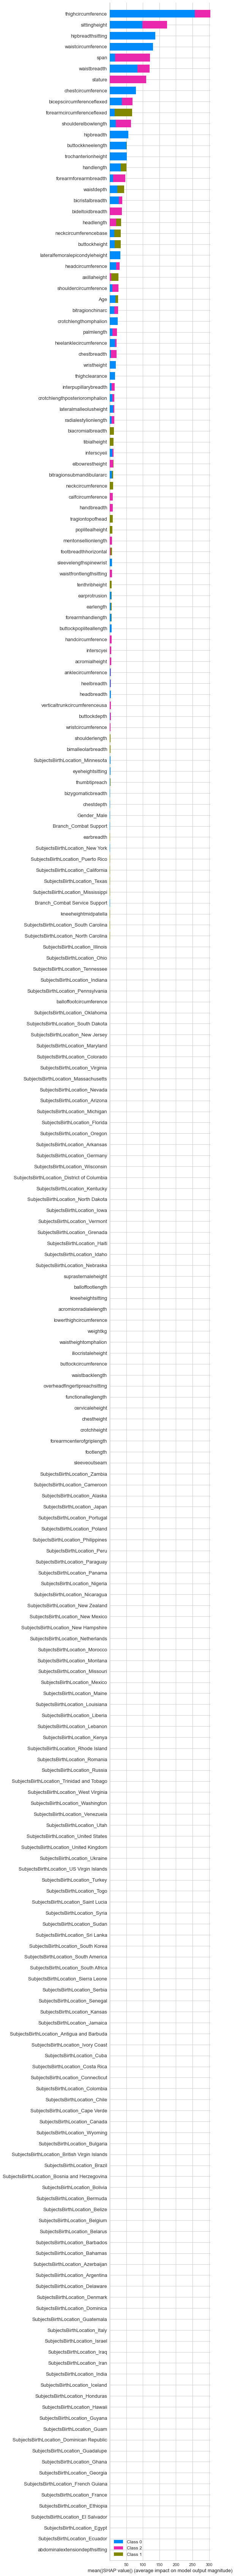

In [469]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

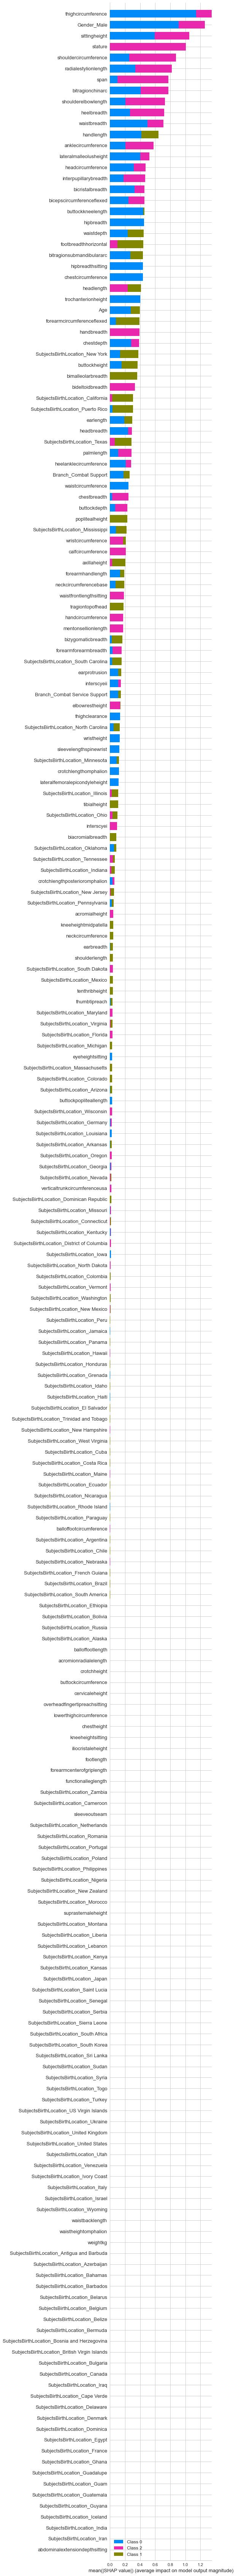

In [470]:
explainer = shap.Explainer(log_model, X_train_scaled)

shap_values = explainer.shap_values(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

In [471]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [472]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [473]:
X3.shape

(5763, 152)

In [474]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=101, stratify =y)

In [475]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [476]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [477]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[218  14  27]
 [  8 108  20]
 [107 122 529]]
              precision    recall  f1-score   support

       Black       0.65      0.84      0.74       259
    Hispanic       0.44      0.79      0.57       136
       White       0.92      0.70      0.79       758

    accuracy                           0.74      1153
   macro avg       0.67      0.78      0.70      1153
weighted avg       0.80      0.74      0.75      1153


Train_Set
[[ 866   50  120]
 [  31  434   77]
 [ 356  513 2163]]
              precision    recall  f1-score   support

       Black       0.69      0.84      0.76      1036
    Hispanic       0.44      0.80      0.56       542
       White       0.92      0.71      0.80      3032

    accuracy                           0.75      4610
   macro avg       0.68      0.78      0.71      4610
weighted avg       0.81      0.75      0.76      4610



In [478]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.529509
test_precision_Hispanic    0.412253
test_recall_Hispanic       0.741709
dtype: float64

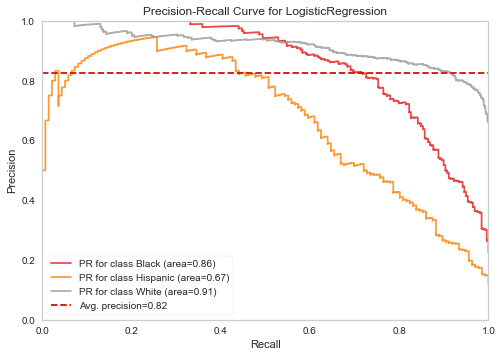

In [479]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

In [480]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [481]:
smote_pipeline_2 = imbpipeline(steps=operations)

In [482]:
smote_pipeline_2.fit(X_train3, y_train3)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [483]:
eval_metric(smote_pipeline_2, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[184   7  68]
 [  2  82  52]
 [ 37  38 683]]
              precision    recall  f1-score   support

       Black       0.83      0.71      0.76       259
    Hispanic       0.65      0.60      0.62       136
       White       0.85      0.90      0.88       758

    accuracy                           0.82      1153
   macro avg       0.77      0.74      0.75      1153
weighted avg       0.82      0.82      0.82      1153


Train_Set
[[ 734   41  261]
 [  23  292  227]
 [ 135  143 2754]]
              precision    recall  f1-score   support

       Black       0.82      0.71      0.76      1036
    Hispanic       0.61      0.54      0.57       542
       White       0.85      0.91      0.88      3032

    accuracy                           0.82      4610
   macro avg       0.76      0.72      0.74      4610
weighted avg       0.82      0.82      0.82      4610



In [484]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.548261
test_precision_Hispanic    0.597198
test_recall_Hispanic       0.517003
dtype: float64

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [485]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [486]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [487]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirt

In [488]:
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.178379
acromialheight                                  1408.606455
acromionradialelength                            328.056221
anklecircumference                               225.199028
axillaheight                                    1301.892070
balloffootcircumference                          244.405344
balloffootlength                                 195.115565
biacromialbreadth                                399.710567
bicepscircumferenceflexed                        341.628839
bicristalbreadth                                 274.852507
bideltoidbreadth                                 491.439355
bimalleolarbreadth                                72.334721
bitragionchinarc                                 324.951067
bitragionsubmandibulararc                        306.662155
bizygomaticbreadth                               139.526288
buttockcircumference                            1021.847996
buttockdepth                            

In [489]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [490]:
y[201]

'White'

In [491]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [492]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7774083952523041

In [493]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.766741166658868

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___